<div align="center">

# Escuela Politécnica Nacional  

</div>

<div align="center">

<span style="font-size:22px"><b>Facultad de Ingeniería en Sistemas</b></span>  

<span style="font-size:20px"><b>Ingeniería en Ciencias de la Computación</b></span>

</div>   

**Asignatura:** Métodos Numéricos  

**Estudiante:** Ismael Freire  

**Grupo:** GR2  

**Título del Trabajo:** U2 Preliminares

**Fecha de Entrega:** 08/06/2025 

# **Representación numérica**

Pasos:

1. Convertir a binario
2. Escribir en notación científica
3. Seguir estándar IEEE 754 32 bits

Ej: Escribir el numero (263.3)10 en coma flotante.

## **Paso 1: Convertir a binario**

$263.3 / 2 = 131.5           →    1$

$131.5 / 2 = 65.75           →    1$

$65.75 / 2 = 32.875         →     1$

$32.875 / 2 = 16.4375       →   0$

$16.4375 / 2 = 8.21875      →   0$

$8.21875 / 2 = 4.109375    →    0$

$4.109375 / 2 = 2.0546875   →  0$

$2.0546875 / 2 = 1.02734375  → 0$

$1.02734375 / 2 = 0.513671875  → 1$

Las divisiones consecutivas se hacen hasta que el cociente sea 0 o la parte entera sea 0. Si el decimal es mayor o igual a 0.5 es 1 y si es menor es 0
Se toma desde abajo hacia arriba

$263_{10} = 100000111_2$

-> Se realizan multiplicaciones sucecivas hasta que se vea algun patron o alguna forma de que se este repitiendo, se toma solo la parte fraccionaria. Si el resultado es mayor o igual a 1 es 1 y si es menor a 1 es 0.

$0.3 * 2 = 0.6 -> 0$

$0.6 * 2 = 1.2 -> 1$

$0.2 * 2 = 0.4 -> 0 $

$0.4 * 2 = 0.8 -> 0$

$0.8 * 2 = 1.6 -> 1$

$0.6 * 2 = 1.2 -> 1$

$0.2 * 2 = 0.4 -> 0$

$0.4 * 2 = 0.8 -> 0$

$0.8 * 2 = 1.6 -> 1$

$0.6 * 2 = 1.2 -> 1$

$0.2 * 2 = 0.4 -> 0$

Y, se encuentra un patron. Entonces se toma desde arriba hacia abajo

$0.3 = 010011_2$, y como se repite infinitamente entre 00 y 11 entonces se debe colocar una raya encima para indicar esa repetición

## **Paso 2. Escribir en notacion cientifica**

$263.3_{10} = 100000111.010011_2$

$263.3_10 = 1.00000111010011 \cdot  2^8$    -> se mueve el punto 8 lugares a la izquierda, por lo que se suma 8 al exponente

## **Paso 3. Seguir el estandar IEEE 754 32 bits**

*0 si es + y 1 si es -*

**Al exponente que se obtuvo en la notación científica anterior se le debe sumar 127 (Exponente + 127)**

Ej:

8 + 127 = 135

135 / 2 = 67.5 -> 1

67.5 / 2 = 33.75 -> 1   

33.75 / 2 = 16.875 -> 1

16.875 / 2 = 8.4375 -> 0

8.4375 / 2 = 4.21875 -> 0

4.21875 / 2 = 2.109375 -> 0

2.109375 / 2 = 1.0546875 -> 0

1.0546875 / 2 = 0.52734375 -> 1

Y, se toma los bits desde abajo hacia arriba, obteniendo 135 base 10 = 10000111 base 2

**Se debe completar la mantisa con ceros hasta llegar a 23 bits**

Ej:

00000111010011 = 00000111010011001100110  -> Si la cadena es periodica infinita, tiene patrones, entonces se completa con los patrones hasta completar los 23 bits. En cambio sino es un numero periodico infinito entonces se divide hasta completar los 23 bits.

**Finalmente, se unen los 3 componentes: el signo, el exponente y la mantisa**

Ej:

0 10000111 0000011101001100110011

## **Comprobación:**

Ahora para transformar el valor anterior a decimal se debe usar la siguiente formula

----

$x = (-1)^s * 2^{(e-127)} * (1 + f)$

----

Donde:

$x = (-1)^s$

  = (-1)^0

  = 1

------

$2^{(e-127)}$

= 2^(135-127)

  = 2^8

  = 256

------

$(1+f)$ donde $f =  \sum_{i = 1}^{23} (f_i \cdot 2^{-i})$ 

$f = 2^{(-6)} + 2^{(-7)} + 2^{(-8)} + 2^{(-10)} + 2^{(-13)} + 2^{(-14)} + 2^{(-17)} + 2^{(-18)} + 2^{(-21)} + 2^{(-22)} = 0.02852$

$(1+0.02852) = 1.02852$

------

Se obtiene el resultado final de la siguiente manera:

$x = 1 \cdot 256 \cdot 1.02852 = 263.30112$

A continuación se muestra la implementación en código Python de la conversión de un número decimal a binario y su representación en coma flotante según el estándar IEEE 754:

In [43]:
# 1ro Función para convertir un número decimal a binario
def decimal_a_binario(numero, bits):
    #Separar la parte entera y parte decimal del numero
    parte_entera = int(numero)
    parte_fraccionaria = numero - parte_entera

    #Convertir la parte entera a binario
    binario_entero = ""
    while parte_entera > 0:
        binario_entero = str(parte_entera % 2) + binario_entero
        parte_entera //= 2

    #Convertir la parte fraccionaria a binario
    binario_decimal = ""
    if bits == 32:
        tamanio_decimal = 24 - len(binario_entero)
        while parte_fraccionaria > 0 and len(binario_decimal) <tamanio_decimal:  
            parte_fraccionaria *= 2
            if parte_fraccionaria >= 1:
                binario_decimal += "1"
                parte_fraccionaria -= 1
            else:
                binario_decimal += "0"
    elif bits == 64:
        tamanio_decimal = 53 - len(binario_entero)
        while parte_fraccionaria > 0 and len(binario_decimal) <tamanio_decimal:  
            parte_fraccionaria *= 2
            if parte_fraccionaria >= 1:
                binario_decimal += "1"
                parte_fraccionaria -= 1
            else:
                binario_decimal += "0"
        
    if binario_entero == "":
        binario_entero = "0"

    if binario_decimal:
        return f"{binario_entero}.{binario_decimal}" 
    else:
        return binario_entero

In [ ]:
# 2do Función para escribir el numero binario en notacion cientifica
def notacion_cientifica (binario):
    # Separar la parte entera y la parte fraccionaria
    if '.' in binario:
        parte_entera, parte_fraccionaria = binario.split('.')
    else:
        parte_entera, parte_fraccionaria = binario, ''

    # Determinar la posición del primer '1' en la parte entera
    if parte_entera != '0':
        # Si hay parte entera, mover el punto a la izquierda
        exponente = len(parte_entera) - 1
        mantisa = parte_entera + parte_fraccionaria
        mantisa = mantisa[0] + '.' + mantisa[1:]
    else:
        # Si no hay parte entera, mover el punto a la derecha
        exponente = -1
        for i, bit in enumerate(parte_fraccionaria):
            if bit == '1':
                exponente = -(i + 1)
                break
        mantisa = '1.' + parte_fraccionaria[i + 1:]
    return mantisa, exponente

In [45]:
#3ro Función para el Estandar IEEE 754 de 32 bits

def signo(numero):
    if numero < 0:
        return 1
    else:
        return 0
    
def exponente (exponente, bits):
    binario = ""
    if bits == 32:
        exponente += 127
        binario = decimal_a_binario(exponente, 32)
    elif bits == 64:
        exponente += 1023
        binario = decimal_a_binario(exponente, 64)
    return binario

def mantisa(numero, bits):
    # Separar la parte entera y la parte fraccionaria
    if '.' in numero:
        parte_entera, parte_fraccionaria = numero.split('.')
    else:
        parte_entera, parte_fraccionaria = numero, ''

    # Obtener la mantisa
    mantisa = parte_entera + parte_fraccionaria
    mantisa = mantisa[1:]  # Eliminar el primer '1'

    if bits == 32:
        # Completar con ceros hasta 23 bits
        mantisa += '0' * (23 - len(mantisa))
        mantisa = mantisa[:23]

    elif bits == 64:
            # Completar con ceros hasta 23 bits
        mantisa += '0' * (52 - len(mantisa))
        mantisa = mantisa[:52]
    
    return mantisa


def formato_IEEE_754(numero_decimal, exponente_notacion, notacion_cientifica, bits):
    return f"{signo(numero_decimal)}  {exponente (exponente_notacion, bits)}  {mantisa(notacion_cientifica, bits)}"


# Número decimal a convertir
numero_decimal = 263.3

# 1ro Conversión a binario	
numero_binario_32 = decimal_a_binario(numero_decimal, 32)
print("El número decimal {} a binario es {}".format(numero_decimal, numero_binario_32)) 

# 2do Conversión a notación científica
notacion_cientifica_32, exponente_notacion_32 = notacion_cientifica(numero_binario_32)
print("El numero en binario {} a su forma en notacion cientifica {} x 2^{}".format(numero_binario_32, notacion_cientifica_32, exponente_notacion_32)) 

# 3ro Conversión a formato IEEE 754
print("El numero en formato IEEE 754 es: {}".format(formato_IEEE_754(numero_decimal, exponente_notacion_32, notacion_cientifica_32, 32)))

El número decimal 263.3 a binario es 100000111.010011001100110
El numero en binario 100000111.010011001100110 a su forma en notacion cientifica 1.00000111010011001100110 x 2^8
El numero en formato IEEE 754 es: 0  10000111  00000111010011001100110


In [46]:
# Primero paso el numero decimal a binario
numero_binario_64 = decimal_a_binario(numero_decimal, 64)
print("El número decimal {} a binario es {}".format(numero_decimal, numero_binario_64))

# 2do Escribir el numero binario en notacion cientifica
notacion_cientifica_64, exponente_notacion_64 = notacion_cientifica(numero_binario_64)
print("El numero en binario {} a su forma en notacion cientifica {} x 2^{}".format(numero_binario_64, notacion_cientifica_64, exponente_notacion_64)) 
    
# 3ro Seguir Estandar IEEE 754 de 64 bits
print("El numero en formato IEEE 754 es: {}".format(formato_IEEE_754(numero_decimal, exponente_notacion_64, notacion_cientifica_64, 64)))

El número decimal 263.3 a binario es 100000111.01001100110011001100110011001100110011001101
El numero en binario 100000111.01001100110011001100110011001100110011001101 a su forma en notacion cientifica 1.0000011101001100110011001100110011001100110011001101 x 2^8
El numero en formato IEEE 754 es: 0  10000000111  0000011101001100110011001100110011001100110011001101


## Aritmetica de digitos finitos

Es la forma en que una computadora realiza operaciones matemátocas usando un número limitado de dígitos.

$± 0,d_1 d_2 d_3 d_4 d_5 ... d_k \cdot 10^n, 1 \leq  d1 \leq  9, n \text{ es entero}$

### Operaciones

1. $x ⨁ y = f_1(f(x) + f_1(y))$

In [6]:
# Función para representar el número en notación científica
def representacion_digitos_computador(numero):
    if numero == 0:
        return "0.0 * 10^0"
    exponente = 0
    valor = abs(numero)
    while valor >= 1:
        valor /= 10
        exponente += 1
    while valor < 0.1:
        valor *= 10
        exponente -= 1
    signo = "-" if numero < 0 else ""
    return signo, valor, exponente

def representacion_notacion(signo, valor, exponente):
    return f"{signo}{valor:.10g} * 10^{exponente}"

# Ejemplo de aplicacion 
# Dados
a = 0.44444
c = 0.81234
suma = a + c

signo, valor, exponente = representacion_digitos_computador(suma)
print(representacion_notacion(signo, valor, exponente))

0.125678 * 10^1


2. $x \ominus y = f_1(f_1(x) - f_1(y)$

In [8]:
# Ejemplo de aplicacion
# Dados:
resta = a - c

signo, valor, exponente = representacion_digitos_computador(resta)
print(representacion_notacion(signo, valor, exponente))

-0.3679 * 10^0


3. $x \otimes y = f_1(f(x) \cdot f_1(y))$

In [9]:
# Dados:
a = 0.5874
c = 0.1234
multiplicacion = a * c

signo, valor, exponente = representacion_digitos_computador(multiplicacion)
print(representacion_notacion(signo, valor, exponente))

0.7248516 * 10^-1


4. $x \oslash y = f_1(f(x) / f_1(y))$

In [11]:
#Dados:
a = 45932.7
b = 0.4

# Primero se debe colocar al valor a en la representación de 10^n
signo, valor, exponente = representacion_digitos_computador(a)
print(representacion_notacion(signo, valor, exponente))

# Luego se divide por el valor b
division = a/b
signo, valor, exponente = representacion_digitos_computador(division)
print(representacion_notacion(signo, valor, exponente))

0.459327 * 10^5
0.11483175 * 10^6


## Algoritmo    

**Definición:** Conjunto de instrucciones paso a paso que explican como realizar una accion de principio a fin.

* El algoritmo es qué se va a hacer y cómo se va a hacer

* El pseudocodigo es la descripción de alto nivel compacta e informal de un algoritmo u programa.

* El programa es la traducción al lenguaje de programación.

-> El seudocodigo puede realizarse despues del programa

### Algoritmos de caracterización

**Categorias**

1. Algoritmo estable: los pequeños cambios en los datos iniciales, producen pequeños cambios en los resultados finales. Es un algoritmo mas preciso porque el error relativo va a mantenerse linealmente.

2. Algoritmo inestable: resultados oscilantes y en el peor de los casos es exponencial.
   Un algoritmo oscilante es mas preciso y menos exacto.

## Algoritmo iterativo

**Definición:** Algoritmo que se repite un número determinado de veces o hasta que se cumpla una condición.

En metodos numericos un algoritmo debe repetirse tomando en cuenta la tolerancia que se tenga,

**Convergencia** Un algoritmo va a converger si los resultados se acercan mas a la solución exacta a medida que se repite el algoritmo. Siendo converger el llegar a un valor esperado, un resultado en el que se espera llegar

**Divergencia** Es cuando los resultados no se van a acercando a la solución exacta, sino que se alejan de ella. En este caso el algoritmo diverge y no se espera llegar a un resultado esperado.

**Tolerancia** Es el limite aceptable de error que se impone para detener el metodo cuando se alcanza una solución lo "suficientemente buena"

## Convergencia, Divergencia y Tolerancia

**Converge** si, al aumentar el número de interaciones, los resultados se acercan a la solución exacta.

Ejemplo en código de la convergencia:

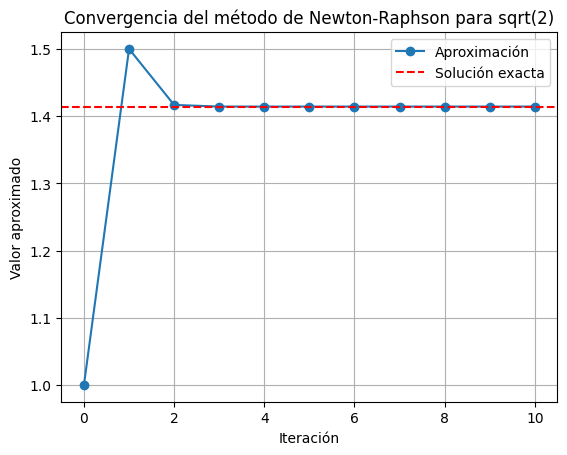

In [15]:
import matplotlib.pyplot as plt

# Ejemplo: Aproximación de la raíz cuadrada de 2 usando el método de Newton-Raphson
def newton_raphson_sqrt2(iteraciones):
    x = 1.0  # Valor inicial
    aproximaciones = [x]
    for _ in range(iteraciones):
        x = 0.5 * (x + 2 / x)
        aproximaciones.append(x)
    return aproximaciones

iteraciones = 10
aprox = newton_raphson_sqrt2(iteraciones)
solucion_exacta = 2 ** 0.5

plt.plot(range(iteraciones + 1), aprox, marker='o', label='Aproximación')
plt.axhline(solucion_exacta, color='r', linestyle='--', label='Solución exacta')
plt.xlabel('Iteración')
plt.ylabel('Valor aproximado')
plt.title('Convergencia del método de Newton-Raphson para sqrt(2)')
plt.legend()
plt.grid(True)
plt.show()

**Diverge** si los resultados se alejan de la solución exacta, o no se estabilizan.

**Tolerancia** es el límite aceptable de error que se impone para detener el método cuando se alcanza una solución lo "suficientemente buena".

## Criterios de parada

Tienen la funcion de evitar los ciclos infinitos.

**TODOS LOS CRITERIOS DE PARADA DEBEN ESTAR EN LOS PROYECTOS, al menos tienen que estar una o mas veces**

**Error absoluto**

Siendo n el numero de iteraciones, e el numero decimal especificado

**Error relativo**

**Valor de la función**

**Numero de iteraciones**

**Tiempo de ejecución**
 Tiempo de ejecucion se traduce a mayor cantidad de recursos del computador.